In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
ITD = ['TCGA-AB-2812-03','TCGA-AB-2825-03', 'TCGA-AB-2830-03', 'TCGA-AB-2836-03', 'TCGA-AB-2840-03', 'TCGA-AB-2853-03', 
       'TCGA-AB-2869-03', 'TCGA-AB-2870-03', 'TCGA-AB-2871-03', 'TCGA-AB-2875-03', 'TCGA-AB-2877-03', 'TCGA-AB-2879-03', 
       'TCGA-AB-2880-03', 'TCGA-AB-2895-03', 'TCGA-AB-2906-03', 'TCGA-AB-2909-03', 'TCGA-AB-2913-03', 'TCGA-AB-2915-03', 
       'TCGA-AB-2921-03', 'TCGA-AB-2922-03', 'TCGA-AB-2925-03', 'TCGA-AB-2930-03', 'TCGA-AB-2931-03', 'TCGA-AB-2934-03',
       'TCGA-AB-2942-03', 'TCGA-AB-2965-03', 'TCGA-AB-2970-03', 'TCGA-AB-2976-03', 'TCGA-AB-2980-03', 'TCGA-AB-2986-03', 
       'TCGA-AB-2993-03', 'TCGA-AB-2994-03', 'TCGA-AB-2998-03', 'TCGA-AB-3006-03', 'TCGA-AB-3007-03']

D835Y = ['TCGA-AB-2811-03', 'TCGA-AB-2814-03', 'TCGA-AB-2816-03', 'TCGA-AB-2818-03', 'TCGA-AB-2834-03', 'TCGA-AB-2851-03',
         'TCGA-AB-2900-03', 'TCGA-AB-2910-03', 'TCGA-AB-2924-03', 'TCGA-AB-2926-03', 'TCGA-AB-2945-03', 'TCGA-AB-2947-03',
         'TCGA-AB-2957-03', 'TCGA-AB-2963-03', 'TCGA-AB-2969-03', 'TCGA-AB-2974-03']


In [3]:
Blk = pd.read_table('plots-data (7).txt', index_col= False).iloc[:,::2].rename(columns = {'BLK, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Blk['Gene'] = 'Blk'
Fgr = pd.read_table('plots-data (8).txt', index_col= False).iloc[:,::2].rename(columns = {'FGR, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Fgr['Gene'] = 'Fgr'
Fyn = pd.read_table('plots-data (9).txt', index_col= False).iloc[:,::2].rename(columns = {'FYN, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Fyn['Gene'] = 'Fyn'
Hck = pd.read_table('plots-data (10).txt', index_col= False).iloc[:,::2].rename(columns = {'HCK, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Hck['Gene'] = 'Hck'
Lck = pd.read_table('plots-data (11).txt', index_col= False).iloc[:,::2].rename(columns = {'LCK, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Lck['Gene'] = 'Lck'
Lyn = pd.read_table('plots-data (12).txt', index_col= False).iloc[:,::2].rename(columns = {'LYN, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Lyn['Gene'] = 'Lyn'
Src = pd.read_table('plots-data (13).txt', index_col= False).iloc[:,::2].rename(columns = {'SRC, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Src['Gene'] = 'Src'
Yes = pd.read_table('plots-data (14).txt', index_col= False).iloc[:,::2].rename(columns = {'YES1, mRNA expression (RNA Seq V2 RSEM)':'mRNA expression (FPKM)'})
Yes['Gene'] = 'Yes'

In [4]:
Blk.head()

,Sample Id,mRNA expression (FPKM),Gene
0,TCGA-AB-3012-03,50.2793,Blk
1,TCGA-AB-3011-03,110.3896,Blk
2,TCGA-AB-3009-03,58.7703,Blk
3,TCGA-AB-3008-03,276.6825,Blk
4,TCGA-AB-3007-03,180.8000,Blk


In [5]:
SFKs = pd.concat([Blk,Fgr,Fyn,Hck,Lck,Lyn,Src,Yes])

#for row in SFKs.itertuples():
def Flt3stat(row):
#print(row)
    if row in ITD: return 'ITD'
    if row in D835Y: return 'D835Y'
    else: return 'WT'

SFKs['Flt3 status'] = SFKs['Sample Id'].apply(Flt3stat)

SFKs

,Sample Id,mRNA expression (FPKM),Gene,Flt3 status
0,TCGA-AB-3012-03,50.2793,Blk,WT
1,TCGA-AB-3011-03,110.3896,Blk,WT
2,TCGA-AB-3009-03,58.7703,Blk,WT
3,TCGA-AB-3008-03,276.6825,Blk,WT
4,TCGA-AB-3007-03,180.8000,Blk,ITD
5,TCGA-AB-3006-03,48.1375,Blk,ITD
6,TCGA-AB-3005-03,24.4640,Blk,WT
7,TCGA-AB-3002-03,1088.0610,Blk,WT
8,TCGA-AB-3001-03,130.4762,Blk,WT
9,TCGA-AB-3000-03,52.3673,Blk,WT


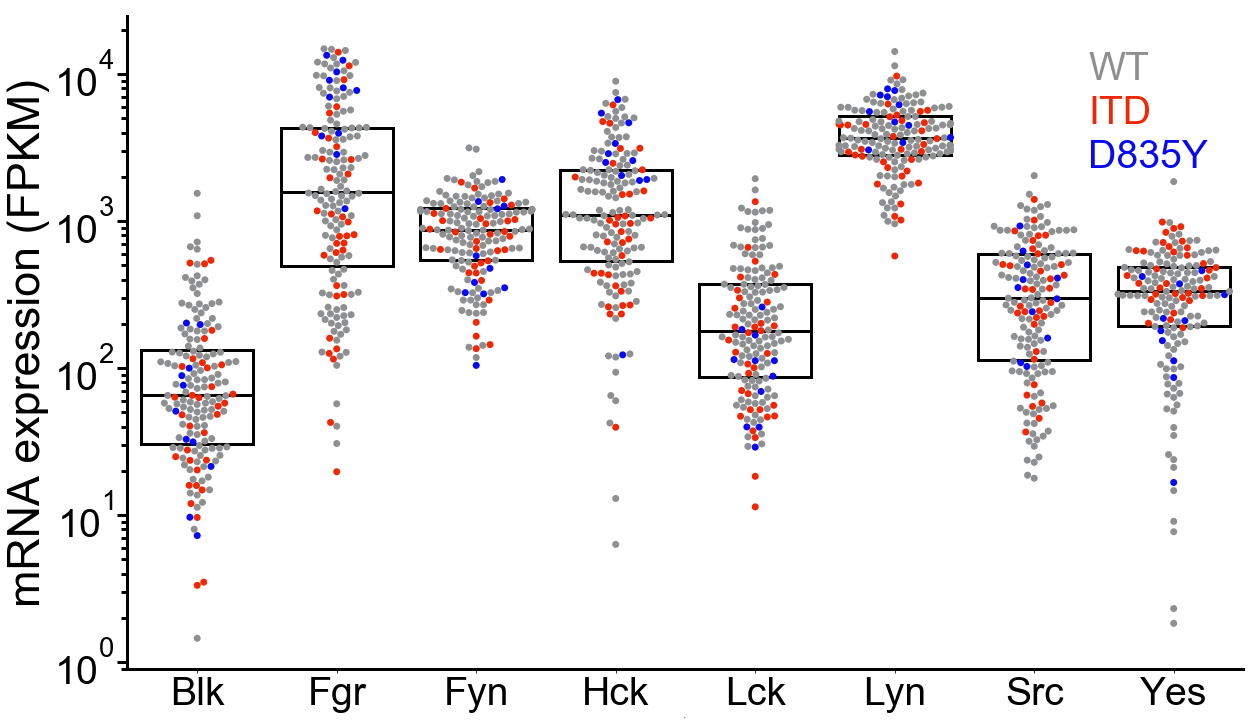

In [6]:
#Set the Font to Arial
mpl.rcParams['font.sans-serif'] = "Arial"

fig, ax = plt.subplots()
fig.set_size_inches(20,12)
ax.set(yscale='log')

#Define the color dictionary
newpal = dict(WT='#8e8f91', ITD='#ef2704', D835Y='#0709f2')

#plt.suptitle('Expression of Src Family Kinases in AML', **afont).set_fontsize(32)

#Make the Plot
ax = sns.swarmplot(y="mRNA expression (FPKM)", x="Gene", size = 7, data=SFKs, hue = 'Flt3 status', palette= newpal)
ax = sns.boxplot(x='Gene', y= 'mRNA expression (FPKM)', data= SFKs, whis = 0, color = 'w', linewidth = 3, fliersize = 0)

#Format the Plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, size= 39.2)
ax.axes.get_xaxis().get_label().set_fontsize(0)
ax.tick_params(axis = 'y', which = 'major', labelsize = 39.2, length= 10, width = 3)
ax.tick_params(axis = 'y', which = 'minor', length= 6, width = 3)
ax.axes.get_yaxis().get_label().set_fontsize(44.8)
plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

#Make and format the legend
leg = ax.legend(fontsize=39.2, frameon= False, labelspacing = 0.2, markerscale= 0)
for handle, text in zip(leg.legendHandles, leg.get_texts()): text.set_color(handle.get_facecolor()[0])


plt.show()

In [8]:
fig.savefig("Expression of Src Family Kinases in AML v3.pdf", bbox_inches='tight', dpi=2000)

fig.savefig("Expression of Src Family Kinases in AML v3.png", bbox_inches='tight', dpi=2000)